In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("data/fish.csv")
df.head()
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


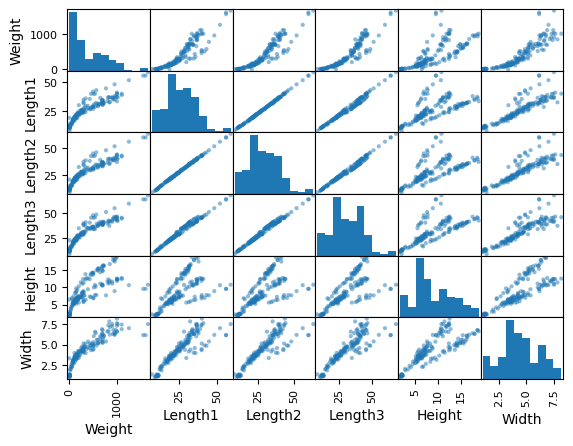

In [25]:
atrr = ['Species','Weight','Length1','Length2','Length3','Height','Width']
pd.plotting.scatter_matrix(df[atrr])
plt.show()



Which input variables correlate the most strongly with weight? Length2.


In [26]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le_species = LabelEncoder()

df['Species'] = le_species.fit_transform(df['Species'])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [32]:
X = df.drop(['Weight'], axis = 'columns')
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
model = LinearRegression()
model = model.fit(X_train,y_train)
print("Intercept: ", model.intercept_)
print("Slope: ",model.coef_)

y_predict = model.predict(X_test)
RMSE = root_mean_squared_error(y_test,y_predict)
R2 = model.score(X_train,y_train)


print("R2: ", R2)
print("Root_mean_squared_Error: ", RMSE)

Intercept:  -639.0706883317962
Slope:  [ 38.94070472  17.33868988  57.07844437 -50.94622136  47.40020755
   9.21854301]
R2:  0.898132669720323
Root_mean_squared_Error:  125.41074409197482


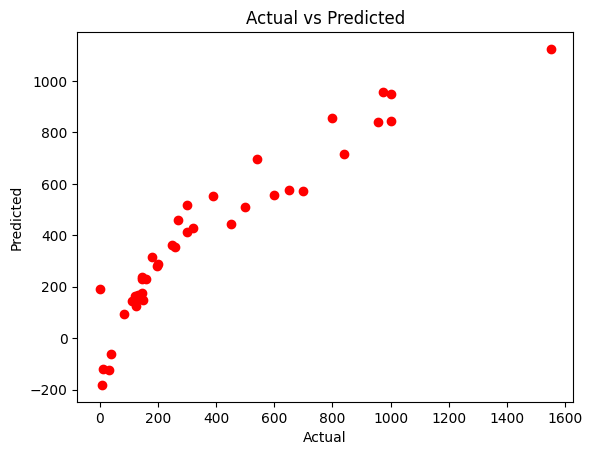

In [55]:
# plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predict, color="red")
# plt.scatter(y_train, y_predict, color = "green") 
# plt.plot(y_train, y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()